<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [18]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [19]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [20]:
boston_df=pd.read_csv(boston_url)

#### Task 1: Familiar with the dataset

In [33]:
# 1. Basic Inspection
print("1. Basic Inspection of Boston Housing Dataset")
print("--------------------------------------------")
print("Dataset Shape (rows, columns):", boston_df.shape)
print("\nColumn Names:")
print(boston_df.columns.tolist())
print("\nData Types:")
print(boston_df.dtypes)
print("\nMissing Values:")
print(boston_df.isnull().sum())
print("\nFirst 5 Rows:")
print(boston_df.head())

print("\n" + "-"*50 + "\n")

1. Basic Inspection of Boston Housing Dataset
--------------------------------------------
Dataset Shape (rows, columns): (506, 15)

Column Names:
['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV', 'AGE_group']

Data Types:
Unnamed: 0       int64
CRIM           float64
ZN             float64
INDUS          float64
CHAS           float64
NOX            float64
RM             float64
AGE            float64
DIS            float64
RAD            float64
TAX            float64
PTRATIO        float64
LSTAT          float64
MEDV           float64
AGE_group     category
dtype: object

Missing Values:
Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
AGE_group     0
dtype: int64

First 5 Rows:
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DI

### Task 2

## Descriptive Statistics

In [31]:
# Generate Descriptive Statistics
print("Descriptive Statistics for Boston Housing Dataset")
print("------------------------------------------------")
desc_stats = boston_df.describe()
print(desc_stats)

Descriptive Statistics for Boston Housing Dataset
------------------------------------------------
       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     

### Visualizations

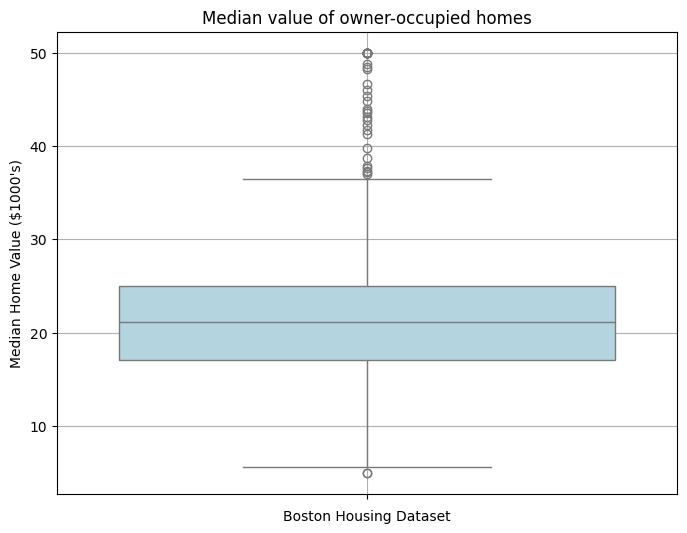

In [21]:
# Boxplot for MEDV
plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'], color='lightblue')
plt.title('Median value of owner-occupied homes')
plt.ylabel('Median Home Value ($1000\'s)')
plt.xlabel('Boston Housing Dataset')
plt.grid(True)
plt.show()

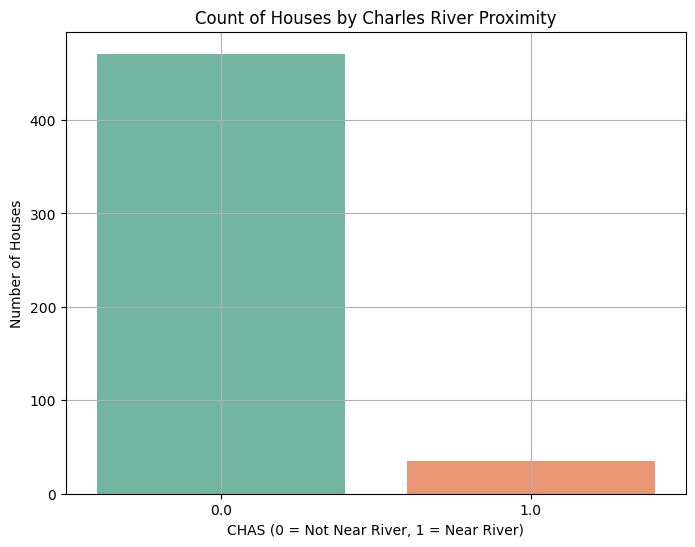

In [22]:
# Bar plot for CHAS
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', hue='CHAS', data=boston_df, palette='Set2', legend=False)
plt.title('Count of Houses by Charles River Proximity')
plt.xlabel('CHAS (0 = Not Near River, 1 = Near River)')
plt.ylabel('Number of Houses')
plt.grid(True)
plt.show()

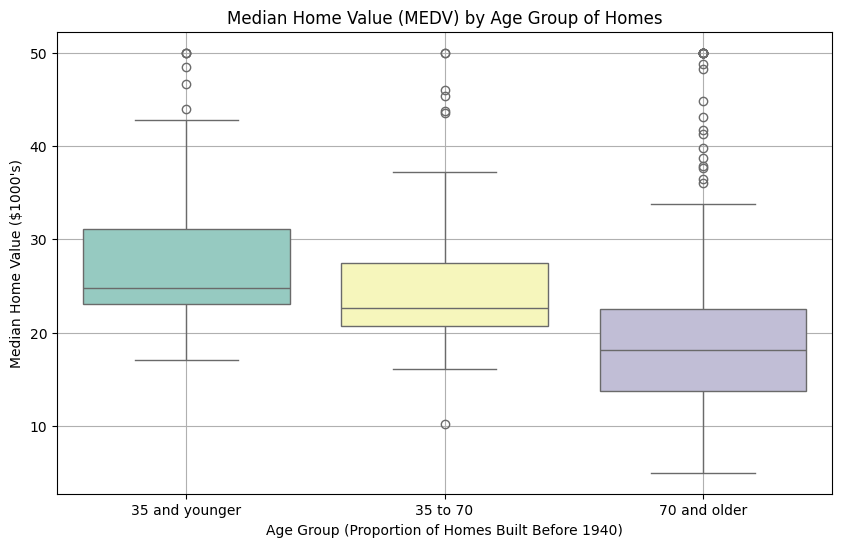

In [23]:
# Discretize AGE into three groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], 
                                bins=[0, 35, 70, 100], 
                                labels=['35 and younger', '35 to 70', '70 and older'], 
                                include_lowest=True)

# Boxplot for MEDV vs AGE_group
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', hue='AGE_group', data=boston_df, palette='Set3', legend=False)
plt.title('Median Home Value (MEDV) by Age Group of Homes')
plt.xlabel('Age Group (Proportion of Homes Built Before 1940)')
plt.ylabel('Median Home Value ($1000\'s)')
plt.grid(True)
plt.show()

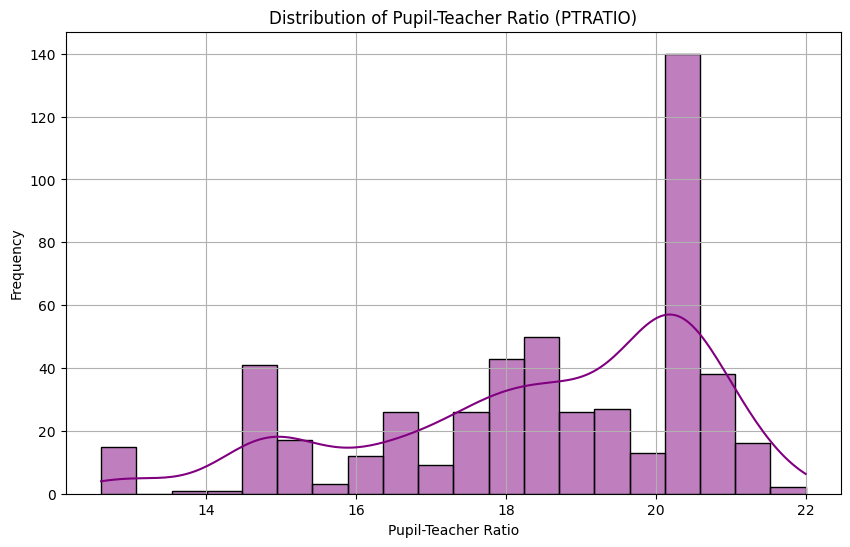

In [24]:
# Histogram for PTRATIO
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True, color='purple')
plt.title('Distribution of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Task 3

In [25]:
# Question 1: T-test for MEDV by CHAS
print("1. T-test: Significant Difference in Median Home Values by Charles River Proximity")
print("--------------------------------------------------------------------------------")
print("Hypothesis:")
print("H0: There is no difference in mean MEDV between houses near (CHAS=1) and not near (CHAS=0) the Charles River.")
print("H1: There is a difference in mean MEDV between houses near (CHAS=1) and not near (CHAS=0) the Charles River.")
print("Significance level: α = 0.05")

# Split data by CHAS
medv_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform T-test (independent samples, assuming unequal variances)
t_stat, p_value = stats.ttest_ind(medv_chas1, medv_chas0, equal_var=False)

print("\nTest Statistics:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

print("\nConclusion:")
if p_value < 0.05:
    print("Reject H0. There is a significant difference in median home values between houses near and not near the Charles River.")
else:
    print("Fail to reject H0. There is no significant difference in median home values between houses near and not near the Charles River.")

print("\n" + "-"*80 + "\n")

1. T-test: Significant Difference in Median Home Values by Charles River Proximity
--------------------------------------------------------------------------------
Hypothesis:
H0: There is no difference in mean MEDV between houses near (CHAS=1) and not near (CHAS=0) the Charles River.
H1: There is a difference in mean MEDV between houses near (CHAS=1) and not near (CHAS=0) the Charles River.
Significance level: α = 0.05

Test Statistics:
T-statistic: 3.1133
P-value: 0.0036

Conclusion:
Reject H0. There is a significant difference in median home values between houses near and not near the Charles River.

--------------------------------------------------------------------------------



In [27]:
# Question 2: ANOVA for MEDV by AGE groups
print("2. ANOVA: Difference in Median Home Values Across Age Groups of Homes")
print("--------------------------------------------------------------------------------")
print("Hypothesis:")
print("H0: There is no difference in mean MEDV across the three AGE groups.")
print("H1: There is a difference in mean MEDV across the three AGE groups.")
print("Significance level: α = 0.05")

# Discretize AGE into three groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], 
                                bins=[0, 35, 70, 100], 
                                labels=['35 and younger', '35 to 70', '70 and older'], 
                                include_lowest=True)

# Perform ANOVA
model = ols('MEDV ~ C(AGE_group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nTest Statistics:")
print(anova_table)

print("\nConclusion:")
p_value_anova = anova_table['PR(>F)'].iloc[0]  # Updated to use .iloc[0]
if p_value_anova < 0.05:
    print("Reject H0. There is a significant difference in median home values across the AGE groups.")
else:
    print("Fail to reject H0. There is no significant difference in median home values across the AGE groups.")

print("\n" + "-"*80 + "\n")

2. ANOVA: Difference in Median Home Values Across Age Groups of Homes
--------------------------------------------------------------------------------
Hypothesis:
H0: There is no difference in mean MEDV across the three AGE groups.
H1: There is a difference in mean MEDV across the three AGE groups.
Significance level: α = 0.05

Test Statistics:
                    sum_sq     df         F        PR(>F)
C(AGE_group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN

Conclusion:
Reject H0. There is a significant difference in median home values across the AGE groups.

--------------------------------------------------------------------------------



In [28]:
# Question 3: Pearson Correlation for NOX and INDUS
print("3. Pearson Correlation: Relationship Between Nitric Oxide Concentrations and Non-Retail Business Acres")
print("--------------------------------------------------------------------------------")
print("Hypothesis:")
print("H0: There is no correlation between NOX and INDUS (ρ = 0).")
print("H1: There is a correlation between NOX and INDUS (ρ ≠ 0).")
print("Significance level: α = 0.05")

# Perform Pearson correlation
corr_coef, p_value_corr = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("\nTest Statistics:")
print(f"Pearson Correlation Coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value_corr:.4f}")

print("\nConclusion:")
if p_value_corr < 0.05:
    print("Reject H0. There is a significant correlation between nitric oxide concentrations and proportion of non-retail business acres.")
else:
    print("Fail to reject H0. There is no significant correlation between nitric oxide concentrations and proportion of non-retail business acres.")

print("\n" + "-"*80 + "\n")

3. Pearson Correlation: Relationship Between Nitric Oxide Concentrations and Non-Retail Business Acres
--------------------------------------------------------------------------------
Hypothesis:
H0: There is no correlation between NOX and INDUS (ρ = 0).
H1: There is a correlation between NOX and INDUS (ρ ≠ 0).
Significance level: α = 0.05

Test Statistics:
Pearson Correlation Coefficient: 0.7637
P-value: 0.0000

Conclusion:
Reject H0. There is a significant correlation between nitric oxide concentrations and proportion of non-retail business acres.

--------------------------------------------------------------------------------



In [29]:
# Question 4: Regression Analysis for DIS on MEDV
print("4. Regression Analysis: Impact of Distance to Employment Centers on Median Home Values")
print("--------------------------------------------------------------------------------")
print("Hypothesis:")
print("H0: The coefficient of DIS is zero (DIS has no impact on MEDV).")
print("H1: The coefficient of DIS is not zero (DIS has an impact on MEDV).")
print("Significance level: α = 0.05")

# Prepare data for regression
X = boston_df['DIS']
X = sm.add_constant(X)  # Add intercept
y = boston_df['MEDV']

# Fit regression model
reg_model = sm.OLS(y, X).fit()

print("\nTest Statistics:")
print(reg_model.summary())

print("\nConclusion:")
p_value_dis = reg_model.pvalues['DIS']
if p_value_dis < 0.05:
    print(f"Reject H0. The weighted distance to employment centers (DIS) has a significant impact on median home values (p-value: {p_value_dis:.4f}).")
else:
    print(f"Fail to reject H0. The weighted distance to employment centers (DIS) has no significant impact on median home values (p-value: {p_value_dis:.4f}).")

4. Regression Analysis: Impact of Distance to Employment Centers on Median Home Values
--------------------------------------------------------------------------------
Hypothesis:
H0: The coefficient of DIS is zero (DIS has no impact on MEDV).
H1: The coefficient of DIS is not zero (DIS has an impact on MEDV).
Significance level: α = 0.05

Test Statistics:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 12 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        11:59:09   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model: